In [6]:
import sys 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [8]:
#data if the games 
games = pd.read_csv('games.csv') 

In [9]:
#print column names 
games.columns

Index(['id', 'type', 'name', 'yearpublished', 'minplayers', 'maxplayers',
       'playingtime', 'minplaytime', 'maxplaytime', 'minage', 'users_rated',
       'average_rating', 'bayes_average_rating', 'total_owners',
       'total_traders', 'total_wanters', 'total_wishers', 'total_comments',
       'total_weights', 'average_weight'],
      dtype='object')

In [10]:
#shape
games.shape

(81312, 20)

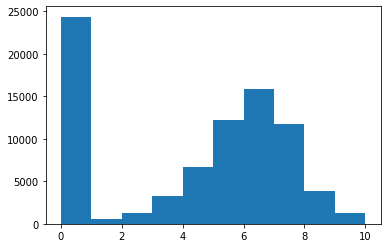

In [11]:
#make a histogram of all average games rating 
plt.hist(games['average_rating'])
plt.show()

In [12]:
#first game w/ zero rating
games[games['average_rating'] == 0].iloc[0]

id                             318
type                     boardgame
name                    Looney Leo
yearpublished                    0
minplayers                       0
maxplayers                       0
playingtime                      0
minplaytime                      0
maxplaytime                      0
minage                           0
users_rated                      0
average_rating                   0
bayes_average_rating             0
total_owners                     0
total_traders                    0
total_wanters                    0
total_wishers                    1
total_comments                   0
total_weights                    0
average_weight                   0
Name: 13048, dtype: object

In [14]:
#first game w/ rating > 0 
games[games['average_rating'] != 0].iloc[0]

id                                  12333
type                            boardgame
name                    Twilight Struggle
yearpublished                        2005
minplayers                              2
maxplayers                              2
playingtime                           180
minplaytime                           180
maxplaytime                           180
minage                                 13
users_rated                         20113
average_rating                    8.33774
bayes_average_rating              8.22186
total_owners                        26647
total_traders                         372
total_wanters                        1219
total_wishers                        5865
total_comments                       5347
total_weights                        2562
average_weight                     3.4785
Name: 0, dtype: object

In [15]:
#getting only non-zero-rated games 
games = games[games['average_rating'] != 0]

In [16]:
games.head()

,id,type,name,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
0,12333,boardgame,Twilight Struggle,2005.0,2.0,2.0,180.0,180.0,180.0,13.0,20113,8.33774,8.22186,26647,372,1219,5865,5347,2562,3.4785
1,120677,boardgame,Terra Mystica,2012.0,2.0,5.0,150.0,60.0,150.0,12.0,14383,8.28798,8.14232,16519,132,1586,6277,2526,1423,3.8939
2,102794,boardgame,Caverna: The Cave Farmers,2013.0,1.0,7.0,210.0,30.0,210.0,12.0,9262,8.28994,8.06886,12230,99,1476,5600,1700,777,3.7761
3,25613,boardgame,Through the Ages: A Story of Civilization,2006.0,2.0,4.0,240.0,240.0,240.0,12.0,13294,8.20407,8.05804,14343,362,1084,5075,3378,1642,4.1590
4,3076,boardgame,Puerto Rico,2002.0,2.0,5.0,150.0,90.0,150.0,12.0,39883,8.14261,8.04524,44362,795,861,5414,9173,5213,3.2943


(array([  602.,  1232.,  2824.,  5212.,  8230., 13606., 13859.,  8471.,
         2224.,   672.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <a list of 10 Patch objects>)

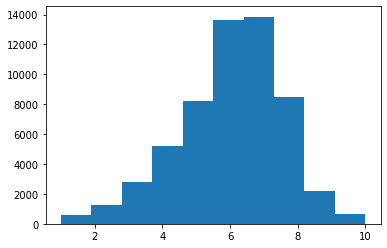

In [18]:
#histogram of filtered ratings
plt.hist(games['average_rating'])

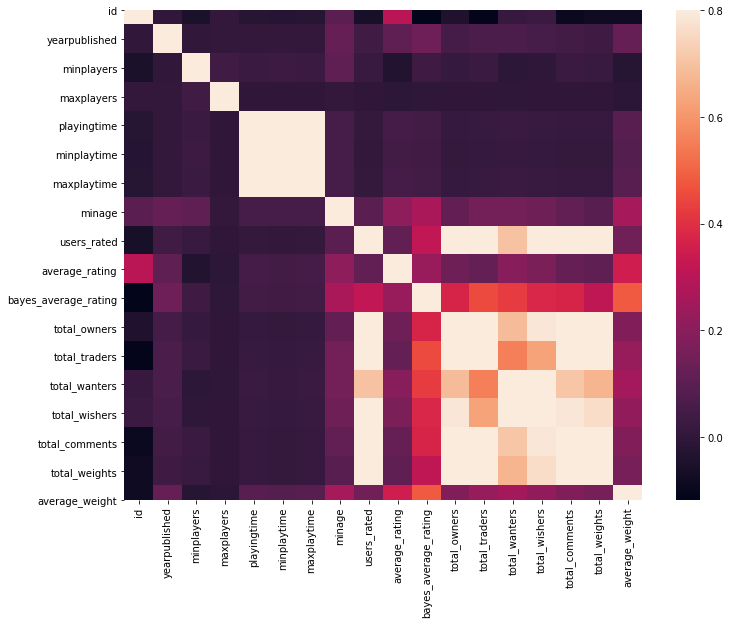

In [20]:
# correlation matrix 
corrMat = games.corr()
fig = plt.figure(figsize= (12,9))

sns.heatmap(corrMat, vmax = 0.8, square= True)

In [78]:
#filtering columns
cols = games.columns.tolist()
cols = [col for col in cols if col not in ['bayes_average_rating', 'average_rating', 'type', 'name', 'id']]
target = 'average_rating'
X = games[cols]
X = X.fillna(X.mean())
y =  games[target]
y = y.fillna(y.mean())

In [79]:
# splitting train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [80]:
# 1st, linear regression model 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

LR = LinearRegression()
LR.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [82]:
# predictions 
pred = LR.predict(X_test)

# mean sqaured error for pred
mean_squared_error(pred, y_test)

2.0830166204321587

The linear regressor is NOT a good choice. The mean squared error is too high. 

In [84]:
# 2nd, random forest regresssor
from sklearn.ensemble import RandomForestRegressor

RFR = RandomForestRegressor(n_estimators= 100, min_samples_leaf = 10, random_state =  1)
RFR.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=10, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=1, verbose=0,
                      warm_start=False)

In [87]:
# predictions 
pred = RFR.predict(X_test)

# mean sqaured error for pred
mean_squared_error(pred, y_test)

1.4315969866709162

Using the RandomForestRegressor resulted in better predictions. 